In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st
import seaborn as sns
font = {'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)
pd.options.display.max_colwidth = 10000

# Loading Movie Lens datafiles

In [8]:
movies=pd.read_csv("dataset2/movies.csv")
links =pd.read_csv("dataset2/links.csv")
ratings=pd.read_csv("dataset2/ratings.csv")

#### DataFrame for filters

In [9]:
tags=pd.read_csv("dataset2/tags.csv")
genome_scores =pd.read_csv("dataset2/genome-scores.csv")
genome_tags =pd.read_csv("dataset2/genome-tags.csv")

### Genome Tagging

1,128 tags for 13,176 unique movies.

Tag genome records how strongly each tag applies to each movie on a continuous scale from 0 to 1.

0 = does not applies at 1 = applies very strongly


In [10]:
genome = pd.merge(left=genome_scores, right=genome_tags, left_on='tagId', right_on='tagId')

##### Genome Tagging for Movie: Toy Story

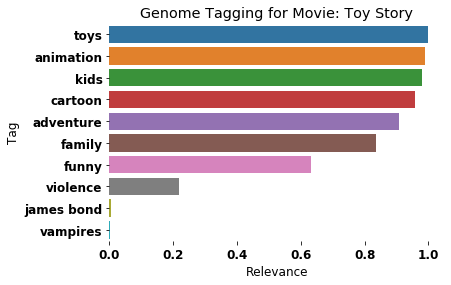

In [11]:
dataset = genome[genome['movieId']==1 & genome['tag'].isin(['toys','vampires','kids','cartoon','adventure','family','funny','violence','animation','james bond'])].sort_values(by ='relevance', ascending=False).head(10)
ax = plt.axes()
sns.barplot(y="tag", x="relevance", data=dataset)
ax.set(ylabel="Tag",
       xlabel="Relevance")
ax.set_title("Genome Tagging for Movie: Toy Story")
sns.despine(left=True, bottom=True)

In [12]:
df = genome[genome['tag'].isin(['james bond'])].sort_values(by ='relevance', ascending=False).head(20)

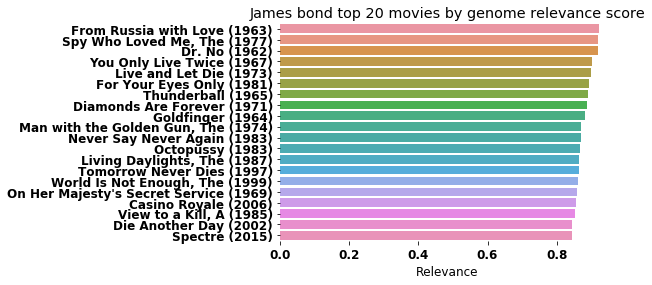

In [13]:
dataset = pd.merge(left=df, right=movies, left_on='movieId', right_on='movieId')


ax = plt.axes()
sns.barplot(y="title", x="relevance", data=dataset)
ax.set(ylabel="",
       xlabel="Relevance")
ax.set_title("James bond top 20 movies by genome relevance score")
sns.despine(left=True, bottom=True)

In [14]:
genome.head()

,movieId,tagId,relevance,tag
0,1,1,0.02900,007
1,2,1,0.03625,007
2,3,1,0.04150,007
3,4,1,0.03350,007
4,5,1,0.04050,007


#### Loading IMDB dataset

In [15]:
imdb_movies=pd.read_csv('IMDb movies.csv')
imdb_name = pd.read_csv('IMDb names.csv')
imdb_title = pd.read_csv('IMDb title_principals.csv')

In [16]:
imdb_movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [17]:
# Sync Imdb id to Movie lens dataset
imdb_movies['Id'] = imdb_movies.imdb_title_id.str.split("tt",expand=True)[1]
imdb_movies.Id=(imdb_movies.Id).astype(int)

In [40]:
links['imdbId_str']= 'tt0' + links['imdbId'].astype('str')
movie_filter = pd.merge(left=links, right=imdb_movies, left_on='imdbId', right_on='Id')

In [41]:
movie_dataset = pd.merge(left=movie_filter, right=movies, left_on='movieId', right_on='movieId')

In [42]:
movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42202 entries, 0 to 42201
Data columns (total 29 columns):
movieId                  42202 non-null int64
imdbId                   42202 non-null int64
tmdbId                   42185 non-null float64
imdbId_str               42202 non-null object
imdb_title_id            42202 non-null object
title_x                  42202 non-null object
original_title           42202 non-null object
year                     42202 non-null int64
date_published           42202 non-null object
genre                    42202 non-null object
duration                 42202 non-null int64
country                  42196 non-null object
language                 41934 non-null object
director                 42191 non-null object
writer                   41911 non-null object
production_company       41162 non-null object
actors                   42182 non-null object
description              41821 non-null object
avg_vote                 42202 non-null float64


In [43]:
movie_dataset.loc[1]

movieId                                                                  2
imdbId                                                              113497
tmdbId                                                                8844
imdbId_str                                                       tt0113497
imdb_title_id                                                    tt0113497
title_x                                                            Jumanji
original_title                                                     Jumanji
year                                                                  1995
date_published                                                  1996-02-16
genre                                            Adventure, Comedy, Family
duration                                                               104
country                                                                USA
language                                                   English, French
director                 

#### Dropping redundant movie_id columns from out dataset. Keeping the orignal movieId to be consistent with our Movielens dataset

In [44]:
movie_dataset = movie_dataset.drop(columns = ['imdbId', 'tmdbId', 'imdbId_str', 'imdb_title_id'])

####  Removing title_x from Imdb

In [45]:
movie_dataset[['title_x','year','title_y']].sample(10)

,title_x,year,title_y
37762,Manuale d'amore,2005,Manual of Love (2005)
12946,Mr. Robinson Crusoe,1932,Mr. Robinson Crusoe (1932)
27081,The Opposite Sex,2014,The Opposite Sex (2014)
15813,Backlight,2010,Backlight (2010)
4510,Focus,2001,Focus (2001)
7259,Ugetsu monogatari,1953,Ugetsu (Ugetsu monogatari) (1953)
29288,Classmates,2015,Classmates (2015)
2482,Twin Falls Idaho,1999,Twin Falls Idaho (1999)
38191,Walking Out,2017,Walking Out (2017)
16031,La souriante Madame Beudet,1923,"Smiling Madame Beudet, The (La souriante Madam..."


#### Dropping title and orignal title from Imdb

In [46]:
movie_dataset = movie_dataset.drop(columns = ['title_x','original_title'])

In [47]:
movie_dataset.loc[1]

movieId                                                                  2
year                                                                  1995
date_published                                                  1996-02-16
genre                                            Adventure, Comedy, Family
duration                                                               104
country                                                                USA
language                                                   English, French
director                                                      Joe Johnston
writer                                     Jonathan Hensleigh, Greg Taylor
production_company                                        TriStar Pictures
actors                   Robin Williams, Jonathan Hyde, Kirsten Dunst, ...
description              When two kids find and play a magical board ga...
avg_vote                                                                 7
votes                    

#### Check null value counts for each column

In [48]:
col_lis = movie_dataset.columns[movie_dataset.isnull().any()]

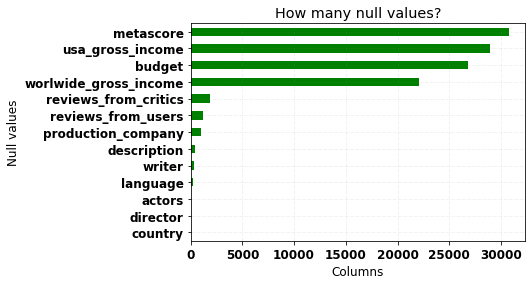

In [49]:
ax=movie_dataset[col_lis].isnull().sum().sort_values().plot.barh(x=0, y=1,color='green')
ax.set_xlabel('Columns')
ax.set_ylabel('Null values')
ax.set_title('How many null values?')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

#### Metascore is considered the rating of a film. Scores are assigned to movie's reviews of large group of the world's most respected critics, and weighted average are applied to summarize their opinions range. The result is shown in single number that captures the essence of critical opinion in one Metascore. Movies will get a Metascore only if at least four critics's reviews are collected. The higher the Metascore, the more positive reviews a movie has. This list contains movies that possess 90 Metascore and above.

#### date_published: Date of first broadcast/publication.

### Should we keep this?

### Dropping for now metascore, usa_gross_income,budget, worldwide_gross_income,date_published

In [50]:
movie_dataset = movie_dataset.drop(columns =['usa_gross_income','worlwide_gross_income', 'metascore','budget','date_published'])

### Getting the distinct genres using both the columns imdb.genre and movielens.genre

In [29]:
movie_dataset.groupby('genres')['genres'].count().sort_values(ascending =False)[:20]

genres
Drama                   7083
Comedy                  4128
(no genres listed)      2061
Comedy|Drama            2028
Drama|Romance           1804
Comedy|Romance          1376
Horror                  1209
Comedy|Drama|Romance     936
Drama|Thriller           749
Crime|Drama              729
Horror|Thriller          721
Thriller                 700
Drama|War                560
Action|Drama             439
Western                  439
Crime|Drama|Thriller     432
Action                   428
Action|Thriller          355
Comedy|Horror            310
Action|Comedy            300
Name: genres, dtype: int64

In [30]:
movie_dataset.groupby('genre')['genre'].count().sort_values(ascending =False)

genre
Drama                     4913
Comedy                    2970
Comedy, Drama             1962
Drama, Romance            1775
Comedy, Drama, Romance    1387
                          ... 
Crime, Comedy, Fantasy       1
Romance, War, Drama          1
Romance, War, Action         1
Romance, War                 1
Western, Horror              1
Name: genre, Length: 1022, dtype: int64

In [31]:
List_of_List = movie_dataset['genre'].str.split(',').to_list()
unique_genre = list(set([a for b in List_of_List for a in b]))
unique_genre = [x.strip(' ') for x in unique_genre]
np.unique(unique_genre)

array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'], dtype='<U11')

In [32]:
List_of_Lists = movie_dataset['genres'].str.split('|').to_list()
unique_genres = list(set([a for b in List_of_Lists for a in b]))
unique_genres = [x.strip(' ') for x in unique_genres]
np.unique(unique_genres)

array(['(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], dtype='<U18')

### Combining Imdb genres and Movie Lens genres????

1) replace(no genres listed) from Movie lens to Imdb genres

2) Combine both the imdb.genre and movielens.genres and keep unique values

In [33]:
movie_dataset.loc[movie_dataset.genres=='(no genres listed)', 'genres'] = movie_dataset.loc[movie_dataset.genres=='(no genres listed)', 'genre']
movie_dataset['cleaned_genre'] = (movie_dataset['genre'].str.split(',') + movie_dataset['genres'].str.split('|'))
movie_dataset['cleaned_genre'] = [[val.strip() for val in sublist] for sublist in movie_dataset['cleaned_genre'].values]
movie_dataset['cleaned_genre'] = movie_dataset['cleaned_genre'].apply(lambda x: list(set(x)))
movie_dataset['cleaned_genre'].head()

In [59]:
movie_dataset['director'].str.split(',')

0                            [John Lasseter]
1                             [Joe Johnston]
2                            [Howard Deutch]
3                          [Forest Whitaker]
4                            [Charles Shyer]
                        ...                 
42197                     [Ismael Rodríguez]
42198                          [Abby Berlin]
42199                      [Pierre Rambaldi]
42200                  [Sasha Louis Vukovic]
42201    [Rodrigo Salomón,  Pietro Scappini]
Name: director, Length: 42202, dtype: object

#### Clean up duplicate actors, directors for each movie

In [66]:
movie_dataset['actors_list'] = movie_dataset['actors'].str.split(',')
movie_dataset['director_list'] = movie_dataset['director'].str.split(',')

In [123]:
movie_dataset[movie_dataset['movieId'] ==140579]['actors'].values

array(['János Bán, Marián Labuda, Rudolf Hrusínský, Rudolf Hrusínský, Rudolf Hrusínský, Petr Cepek, Libuse Safránková, Jan Hartl, Miloslav Stibich, Oldrich Vlach, Stanislav Aubrecht, Zdenek Sverák, Magda Krízková, Július Satinský, Josef Somr'],
      dtype=object)

#### Keeping raitings for the one's in the movie_dataset

In [196]:
ratings

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


In [195]:
movie_list = movie_dataset['movieId'].values

In [199]:
movie_ratings =ratings[ratings['movieId'].isin(movie_list)]

In [200]:
print(ratings.shape)
print(movie_ratings.shape)

(27753444, 4)
(27065078, 4)


In [183]:
movie_rating_count = ratings.groupby(['movieId'])['movieId'].count().reset_index(name="count")

In [207]:
movie_ratings.groupby(['movieId','userId']).mean()

rating   timestamp
movieId userId                    
1       4          4.0  1113765937
        10         5.0   948885850
        14         4.5  1442169375
        15         4.0  1370810063
        22         4.0  1237622631
...                ...         ...
193874  181577     5.0  1537927821
193878  176871     2.0  1537875080
193882  33330      2.0  1537890512
193886  206009     2.5  1537917854
        226715     4.0  1537916177

[27065078 rows x 2 columns]

In [208]:
tags.shape

(1108997, 4)

In [205]:
tags[tags['tag'].isna()]

,userId,movieId,tag,timestamp
483263,80439,123,NaN,1199450867
483264,80439,346,NaN,1199451946
483268,80439,1184,NaN,1199452261
483275,80439,1785,NaN,1199452006
483276,80439,2194,NaN,1199450677
483278,80439,2691,NaN,1199451002
483286,80439,4103,NaN,1199451920
483288,80439,4473,NaN,1199451040
483290,80439,4616,NaN,1199452441
483306,80439,7624,NaN,1199452266


In [240]:
movie_tags = tags[tags['movieId'].isin(movie_list)]

In [241]:
movie_tags.shape

(1032942, 4)

In [242]:
movie_tags = movie_tags.dropna()

In [243]:
movie_tags[movie_tags['tag'].isna()]

,userId,movieId,tag,timestamp


In [244]:
df_tags = movie_tags.groupby('movieId').agg({'tag': ', '.join}).reset_index()

In [245]:
df_tags['tag'] = df_tags['tag'].str.lower()

In [246]:
df_tags['tag'] = df_tags['tag'].str.split(',').apply(set)

In [249]:
df_tags['tag_length']  

,movieId,tag
0,1,"{ buzz lightyear, fun family movie, woody, tumey's vhs, imdb top 250, good animation, new toy, resourcefulness, feel-good, animated, dolls, friends, soothing, classic, neighborhood, children, witty, rainy day watchlist, unny, lovable characters, 2009 reissue in stereoscopic 3-d, rousing, childish, cute, exciting plot, good cartoon chindren, fanciful, disney animated feature, é˜®ä¸€é¸£, family film, mission, itaege, interesting, fantasy, cg animation, clv, jealousy, want to see again, lots of heart, boy next door, unlikely friendships, adventure, pixar animation, cgi classic, want, joss whedon, cgi, action figures, toys played, good time, touching story, children cartoon, toy story, time travel, very good, owned, kids, buddy movie, national film registry, walkie talkie, light hearted, animation, toys come to life, family, fun, tumey's to see again, clever, ss, digital, monsters, funny, buy, bd-video, avi, toy comes to life, nostalgic, animated, comedy, friendship, great movie, heroic mission, tom hanks, boy, pixar, light, computer animation, dvd-video, kids and family, almost favorite, 55 movies every kid should see--entertainment weekly, rivalry, whimsica, watched, action, erlend's dvds, humorous, voice acting, daring rescues, story, cowboy, ...}"
1,2,"{ see also:zathura, based on children's book, giant insect, itaege, fantasy, scary, fantasy, not for kids, disappearance, chris van allsburg, clv, magic board game, family, saturn award (best supporting actress), time, adapted from:book, horrifying (but not horror genre), adventure, fiction, adaptation of book, herds of cgi animals, board game, jungle, robin williams, comedy, children, filmed in bc, rainy day watchlist, saturn award (best special effects), bad cgi, joe johnston, childhood recaptured, thrill, recluse, for children, based on a book, time travel, kids, monkey, baker viu, childish, game, animals, kirsten dunst, kid flick, dynamic cgi action, lebbat, new home}"
2,3,"{moldy, old man, funny, best friend, burgess meredith, clv, fishing, sophia loren, howard deutch, no_fa_ganes, old, funniest movies, comedy, old people that is actually funny, good soundtrack, comedinha de velhinhos engraã§ada, daryl hannah, sequel fever, sequel, comedinha de velhinhos engraãƒâ§ada, jack lemmon, grun running, moldy, walter matthau, ann margaret, duringcreditsstinger}"
3,4,"{ characters, chick flick, divorce, single mother, girl movie, based on novel or book, interracial relationship, characters, revenge, clv}"
4,5,"{ fantasy, pregnancy, parent child relationship, it thought it was funny but it wasn't, confidence, clv, contraception, worst movies ever, touching, remake, comedy, sequel fever, midlife crisis, sequel, daughter, childhood classics, gynecologist, baby, wedding, aging, steve martin, family, diane keaton, humorous, watched under duress, steve martin}"
...,...,...
34698,193637,"{ sexuality, lgbtq, friendship, canadian, coming of age, teen, high school, gender identity}"
34699,193683,"{ pretentious, bad science, shaky cam, plot holes, illogical}"
34700,193731,"{ based on a book, 19th century, honor, treason, republicanism, femme fatale, premonition, fencing, conspiracy, madrid, spain}"
34701,193761,"{ rebel, revolution, hostage, concert, song, singer, opera singer, stockholm syndrome, kidnapping, singing}"
